# Tracks


#### Load data


In [21]:
import pandas as pd

df = pd.read_csv("./data/playlist_stats_clean.csv")

In [22]:
from notebook_functions import show

show(df)

name                           artist             album  \
0               Rumble  Skrillex, Fred again.., Flowdan            Rumble   
1    Strung Out Johnny                         Iggy Pop       EVERY LOSER   
2           Sail On By                     Blanco White        Sail On By   
3       Be On Your Way                         Daughter    Be On Your Way   
4              Flowers                      Miley Cyrus           Flowers   
..                 ...                              ...               ...   
236              Kapot                            Véras         Het Niets   
237       Child Of Sin           Kovacs, Till Lindemann      Child Of Sin   
238             Blinds                     Robin Kester  Honeycomb Shades   
239         Always You                     Depeche Mode      Memento Mori   
240             Helium                            Pitou          Big Tear   

    added_by              added_at  
0     Thomas  2023-01-09T10:23:07Z  
1       Hans  2023-01-09T20:40:04Z  
2     Sandra  2023-01-13T12:15:11Z  
3     Sandra  2023-01-13T12:19:16Z  
4     Sandra  2023-01-15T09:41:42Z  
..       ...                   ...  
236     Hans  2023-12-27T13:03:20Z  
237     Hans  2023-12-27T13:05:36Z  
238     Hans  2023-12-27T13:17:15Z  
239     Hans  2023-12-27T13:24:47Z  
240     Hans  2023-12-27T13:29:33Z  

[241 rows x 5 columns]

#### Track stats


In [23]:
import plotly.express as px

# Creating a bar chart to visualize the number of tracks added by each person
added_by_count = df["added_by"].value_counts()
fig = px.bar(
    added_by_count,
    title="Number of Tracks Added by Each Person",
    labels={"index": "Added By", "value": "Number of Tracks"},
)
fig.show()

In [24]:
import plotly.express as px

# Convert 'added_at' to datetime and extract the month
df["added_at"] = pd.to_datetime(df["added_at"])
df["month"] = df["added_at"].dt.month

# Group by month and added_by, then count the number of tracks
grouped_df = df.groupby(["month", "added_by"]).size().reset_index(name="tracks")

# Creating a stacked bar chart
fig = px.bar(
    grouped_df,
    x="month",
    y="tracks",
    color="added_by",
    title="Number of Tracks Added by Each Person Per Month",
    labels={"month": "Month", "tracks": "Number of Tracks"},
    category_orders={"month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
)

# Showing the figure
fig.show()

In [25]:
df.columns

Index(['name', 'artist', 'album', 'album_type', 'release_date', 'duration',
       'duration_ms', 'added_at', 'added_by_id', 'track_popularity',
       'track_id', 'track_uri', 'artist_uris', 'artist_names', 'enriched',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'artists_genres', 'artists_popularities',
       'artists_avg_popularity', 'added_by', 'month'],
      dtype='object')

In [26]:
import plotly.express as px

# Convert 'added_at' to datetime and extract the month
df["release_date"] = pd.to_datetime(df["release_date"])
df["year_month"] = df["release_date"].dt.to_period("M").astype(str)  # Convert Period to string

# Group by 'year_month' and count the number of tracks
grouped_df = df.groupby("year_month").size().reset_index(name="tracks")

# Creating a bar chart
fig = px.bar(
    grouped_df,
    x="year_month",
    y="tracks",
    title="Number of Tracks Released Per Month/Year",
    labels={"year_month": "Year-Month", "tracks": "Number of Tracks"},
)

# Showing the figure
fig.show()

In [27]:
# Creating a scatter plot of tempo vs valence
fig = px.scatter(
    df,
    x="tempo",
    y="valence",
    color="added_by",
    title="Tempo vs Valence for Each Song",
    labels={"tempo": "Tempo (BPM)", "valence": "Valence"},
)

# Showing the figure
fig.show()

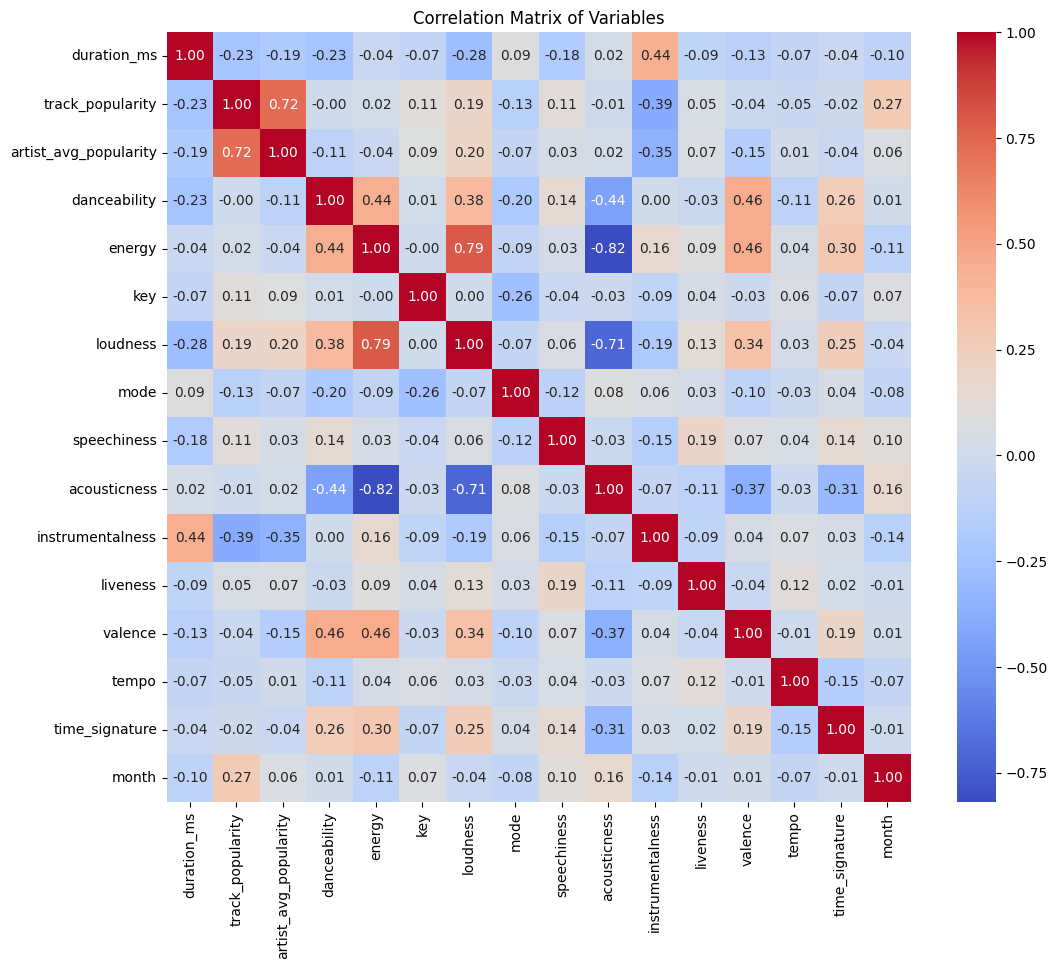

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
df_corr = df.drop(
    [
        "added_at",
        "added_by",
        "name",
        "artist",
        "album",
        "album_type",
        "track_id",
        "artist_names",
        "artist_genres",
        "artist_popularities",
        "release_date",
        "duration",
    ],
    axis=1,
)
corr_matrix = df_corr.corr()

# Creating a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Variables")
plt.show()

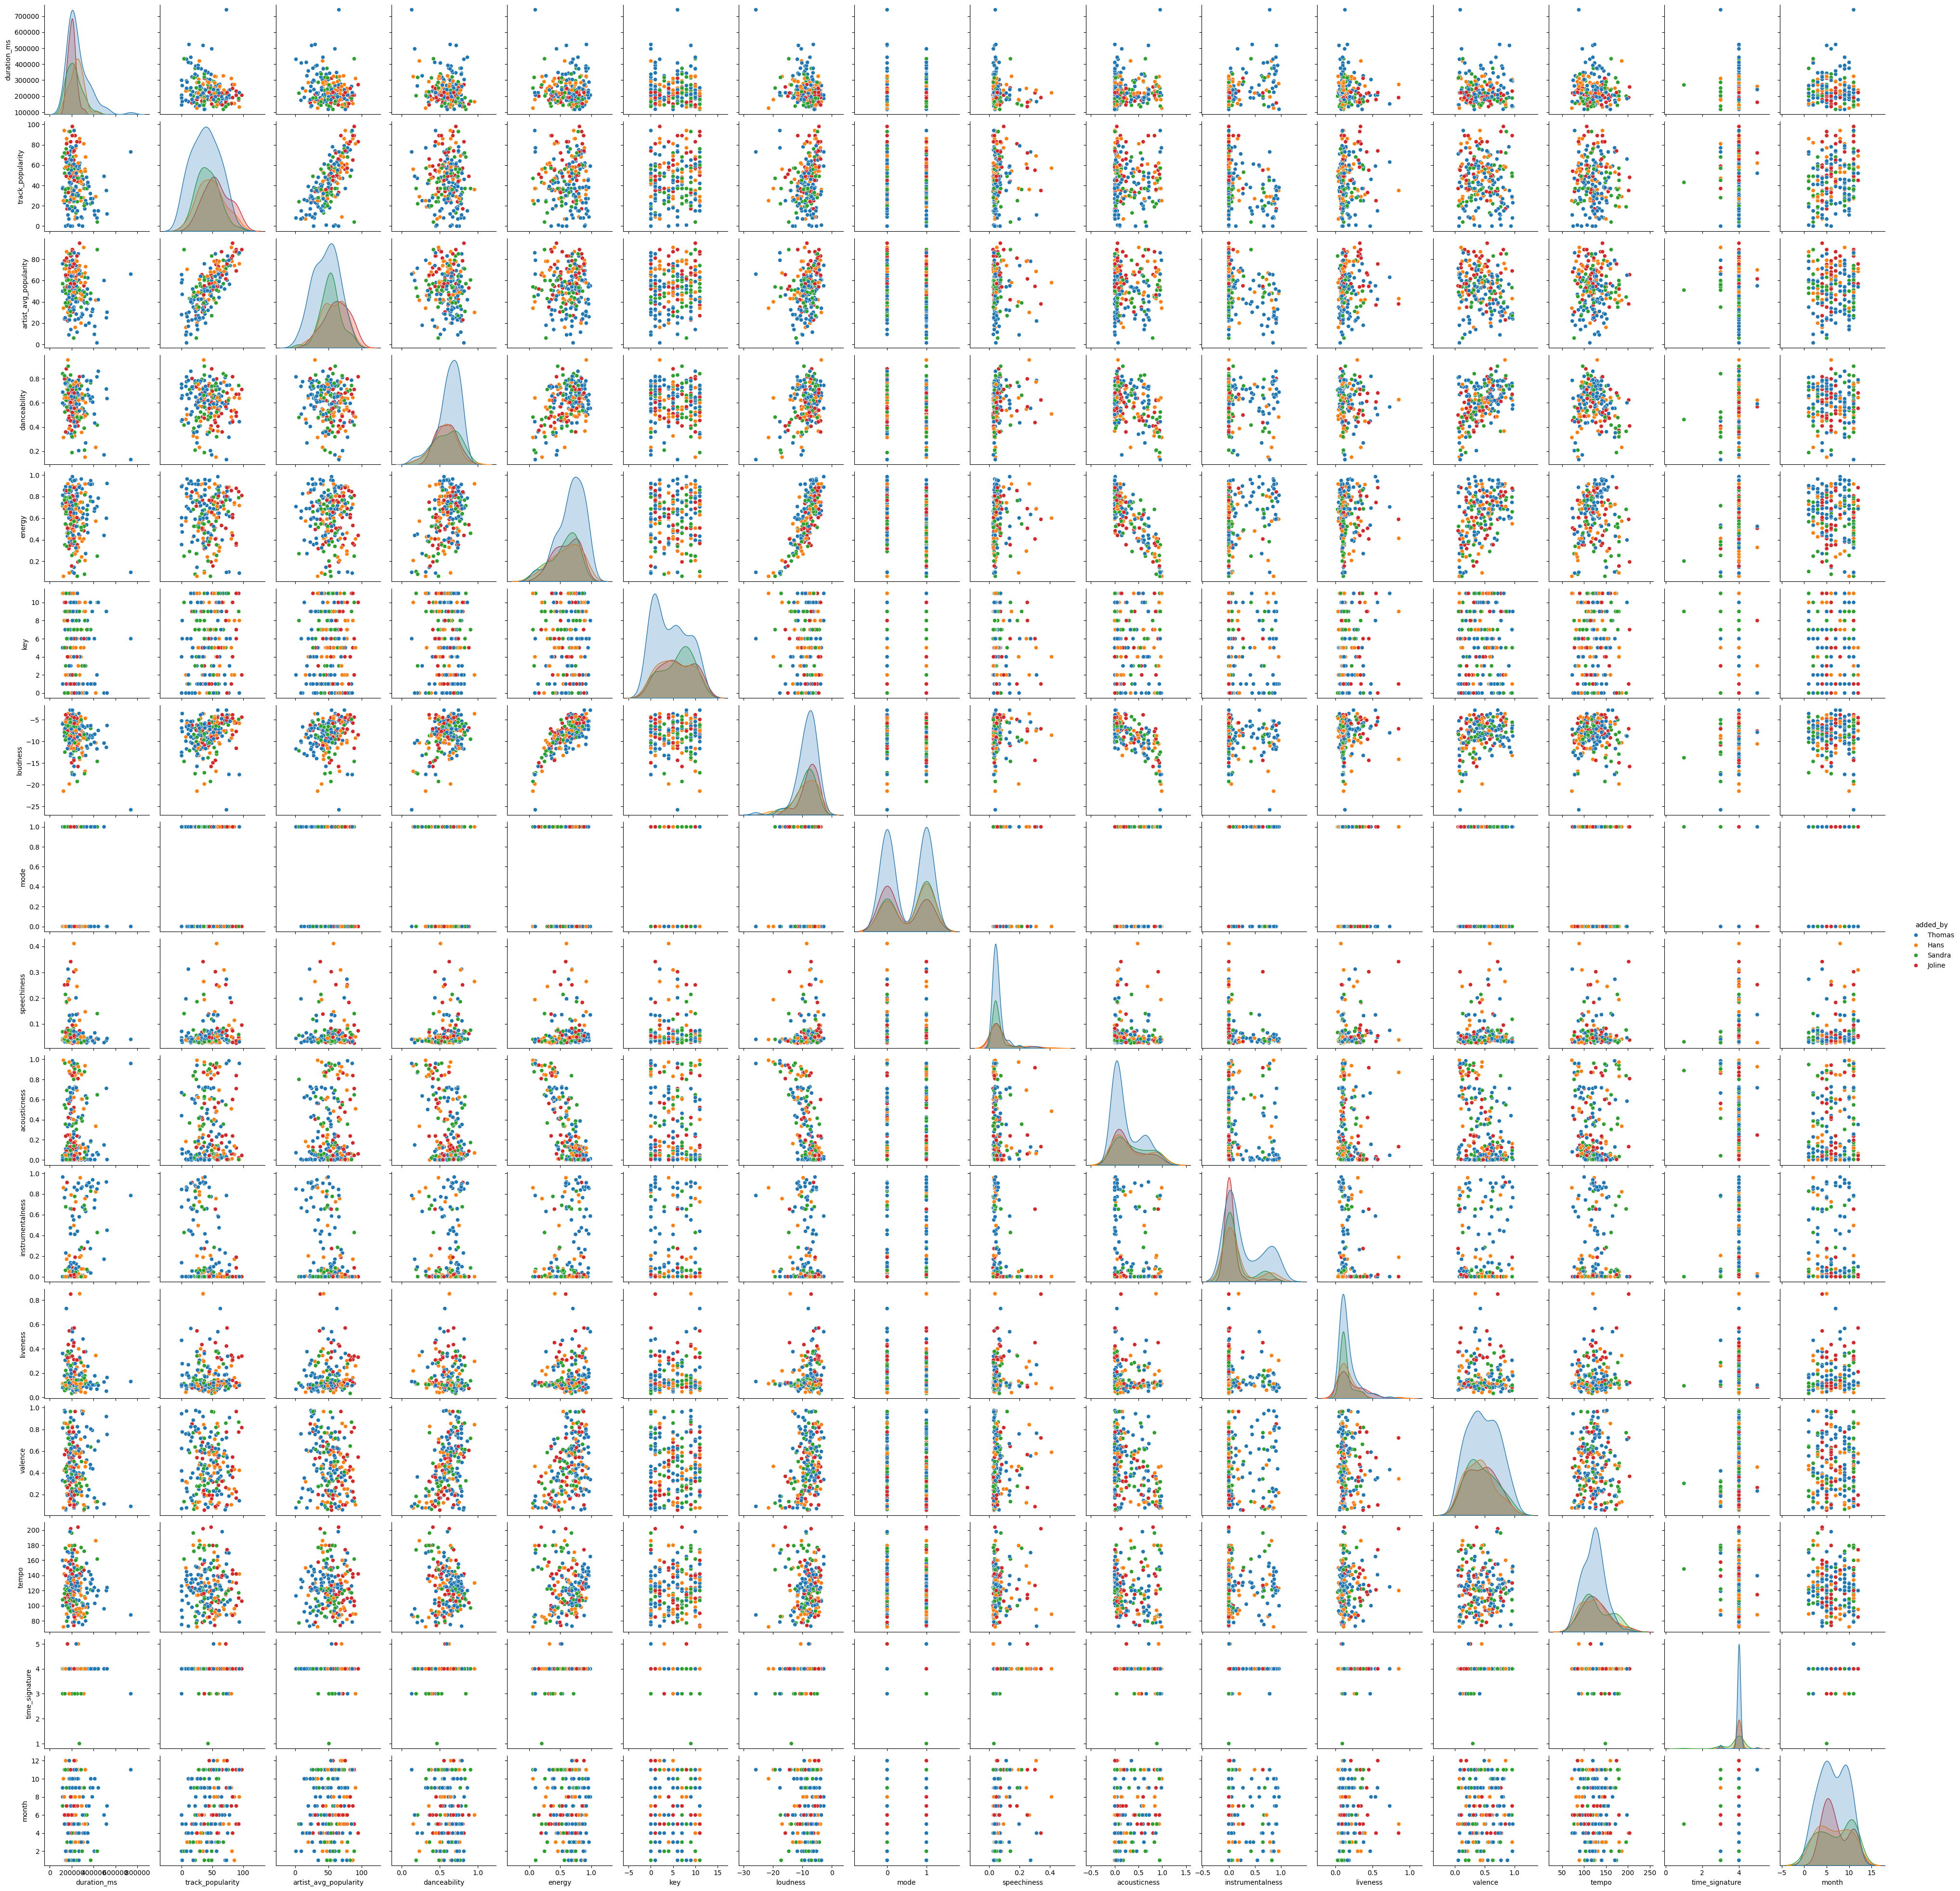

In [ ]:
import seaborn as sns

# Create a pairplot of the DataFrame
sns.pairplot(df, hue="added_by")


# Display the plot
plt.show()

In [5]:
import numpy as np
import plotly.graph_objs as go
from notebook_functions import show

# Creating an interactive plot with Plotly
fig = go.Figure()

# Get list of adders
adders = df["added_by"].unique()

# Add track info to dataframe
df["track_info"] = df["name"] + " by " + df["artist"]

# Define color palette for the plots
color_palette = px.colors.qualitative.Plotly

# Adding boxplots with correct x-indexing
for i, adder in enumerate(df["added_by"].unique(), 1):
    # Filter by adder
    df_adder = df[df["added_by"] == adder]

    # Create boxplot
    fig.add_trace(
        go.Box(
            y=df_adder["tempo"],
            name=adder,
            boxpoints=False,
            x=[i] * len(df_adder),
            hoverinfo="none",
            marker_color=color_palette[i % len(color_palette)],
        )
    )

    # Create scatter plot points with jitter
    jittered_x = np.random.Generator(np.random.PCG64()).normal(i, 0.1, size=len(df_adder))

    fig.add_trace(
        go.Scatter(
            x=jittered_x,
            y=df_adder["tempo"],
            mode="markers",
            name=f"{adder} points",
            text=df_adder["track_info"],
            marker={"size": 6, "color": "grey", "opacity": 0.5},
        )
    )

    # Depict top 5 tracks by tempo
    show(df_adder, n=5, column="tempo", sort_values=True)

# Update layout to match the adders with their respective x-positions
fig.update_layout(
    title="Interactive Boxplot of Tempo with Scatter Plot Points Split by Who Added the Track",
    xaxis={
        "title": "Added By",
        "tickmode": "array",
        "tickvals": list(range(1, len(adders) + 1)),
        "ticktext": adders,
    },
    yaxis={"title": "Tempo"},
    showlegend=False,
)

# Show plot
fig.show()

NameError: name 'px' is not defined

In [6]:
from notebook_functions import create_boxplot

# Create boxplot
create_boxplot(df, "track_popularity", print_top=True)

Top 5 track_popularity added by Thomas:


track_popularity                                               name  \
207                94  What Was I Made For? [From The Motion Picture ...   
153                79                                Escapism. - Sped Up   
107                78                                      Relax My Eyes   
144                77                          Paris, Texas (feat. SYML)   
43                 75                                               Lost   

                 artist                                              album  \
207       Billie Eilish  What Was I Made For? [From The Motion Picture ...   
153     RAYE, 070 Shake                                          Escapism.   
107  ANOTR, Abel Balder                                      Relax My Eyes   
144  Lana Del Rey, SYML  Did you know that there's a tunnel under Ocean...   
43          Linkin Park                                               Lost   

    added_by              added_at  
207   Thomas  2023-11-24T19:29:02Z  
153   Thomas  2023-09-27T14:45:39Z  
107   Thomas  2023-06-22T18:41:43Z  
144   Thomas  2023-09-18T12:40:02Z  
43    Thomas  2023-04-06T20:38:26Z

Top 5 track_popularity added by Hans:


track_popularity                       name                       artist  \
135                94                      Prada  cassö, RAYE, D-Block Europe   
2                  86                  Kill Bill                          SZA   
136                86                  Escapism.              RAYE, 070 Shake   
12                 82  Unholy (feat. Kim Petras)        Sam Smith, Kim Petras   
146                81  Slime You Out (feat. SZA)                   Drake, SZA   

                     album added_by              added_at  
135                  Prada     Hans  2023-08-28T09:40:07Z  
2                      SOS     Hans  2023-01-09T20:50:12Z  
136  My 21st Century Blues     Hans  2023-08-28T09:57:11Z  
12                  Gloria     Hans  2023-02-05T13:48:45Z  
146          Slime You Out     Hans  2023-09-24T07:59:34Z

Top 5 track_popularity added by Sandra:


track_popularity                            name  \
185                93                         Houdini   
195                76  UNHEALTHY (feat. Shania Twain)   
197                72                        Basquiat   
115                68                           STRUT   
23                 68                        Die 4 Me   

                       artist                           album added_by  \
185                  Dua Lipa                         Houdini   Sandra   
195  Anne-Marie, Shania Twain  UNHEALTHY (feat. Shania Twain)   Sandra   
197                     Asake                     Work Of Art   Sandra   
115                   EMELINE                           STRUT   Sandra   
23                     Halsey                        Die 4 Me   Sandra   

                 added_at  
185  2023-11-10T12:21:16Z  
195  2023-11-18T12:03:39Z  
197  2023-11-18T12:09:16Z  
115  2023-07-01T14:16:51Z  
23   2023-03-01T00:06:45Z

Top 5 track_popularity added by Joline:


track_popularity                                               name  \
179                98                               Standing Next to You   
84                 93            Dance The Night - From Barbie The Album   
124                89                       (It Goes Like) Nanana - Edit   
181                89  Can’t Catch Me Now - from The Hunger Games: Th...   
81                 89                                  Say Yes To Heaven   

             artist                                              album  \
179       Jung Kook                                             GOLDEN   
84         Dua Lipa            Dance The Night (From Barbie The Album)   
124       Peggy Gou                       (It Goes Like) Nanana [Edit]   
181  Olivia Rodrigo  Can’t Catch Me Now (from The Hunger Games: The...   
81     Lana Del Rey                                  Say Yes To Heaven   

    added_by              added_at  
179   Joline  2023-11-09T08:53:11Z  
84    Joline  2023-05-26T07:14:03Z  
124   Joline  2023-07-25T15:36:59Z  
181   Joline  2023-11-09T08:55:04Z  
81    Joline  2023-05-22T06:41:08Z

In [7]:
cols_ordinal = df.columns
cols_ordinal = cols_ordinal.drop(
    [
        "name",
        "artist",
        "album",
        "album_type",
        "track_id",
        "artist_names",
        "artist_genres",
        "artist_popularities",
        "release_date",
        "added_at",
        "added_by",
        "track_info",
        "duration",
    ]
)
cols_ordinal

Index(['duration_ms', 'track_popularity', 'artist_avg_popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [8]:
from notebook_functions import create_boxplot

for col in cols_ordinal:
    create_boxplot(df, col)